# Cattura geometrica

Uso la formula dell'articolo:
    
    - [Garani 2017](https://arxiv.org/pdf/1702.02768.pdf)

Calcolo il fattore correttivo per la cattura geometrica $\xi$



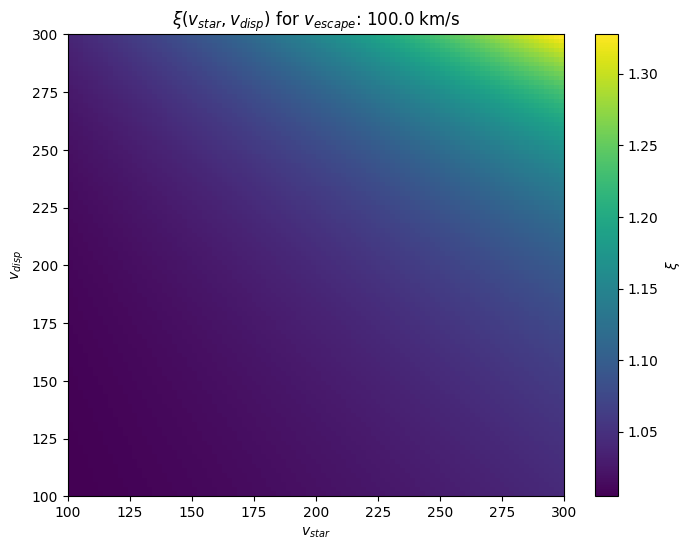

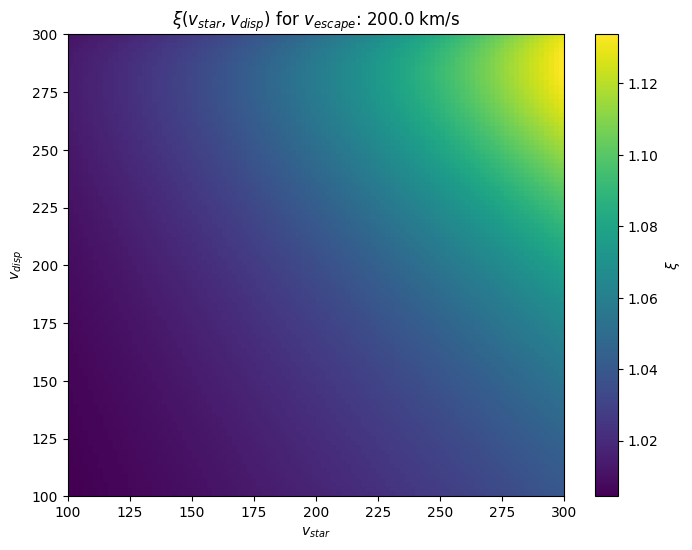

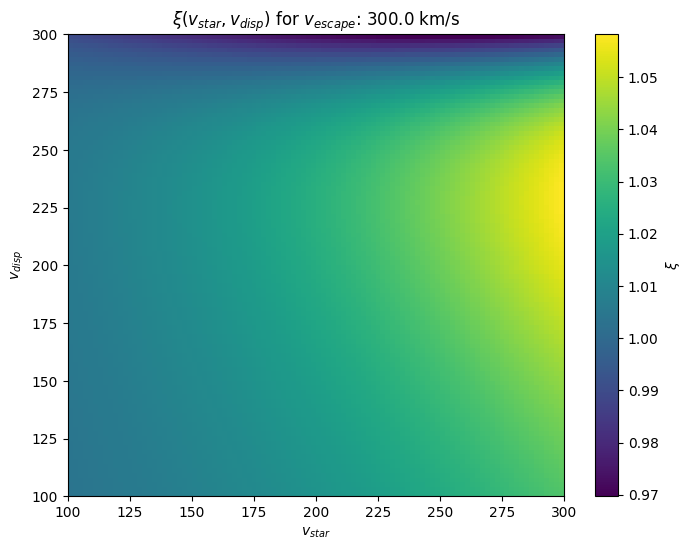

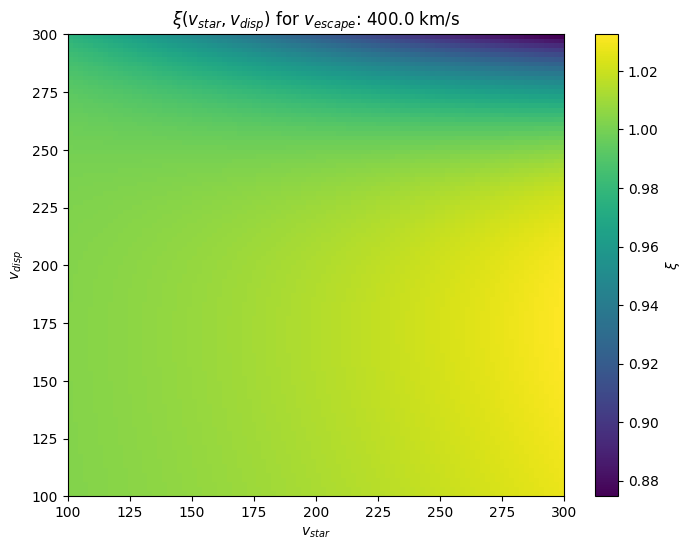

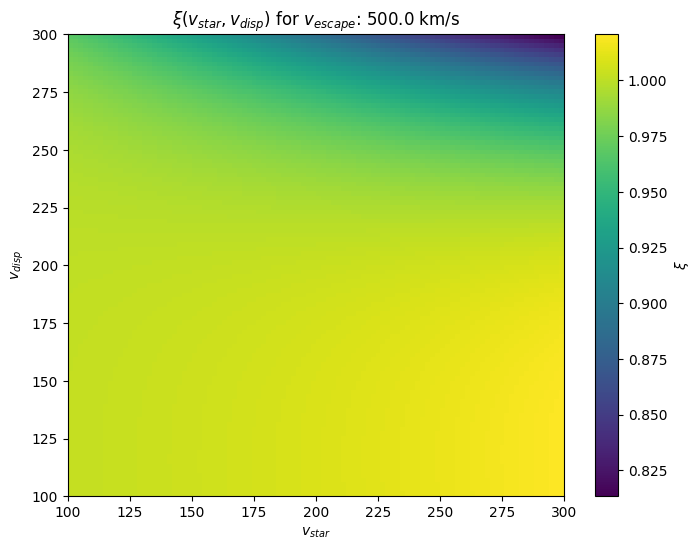

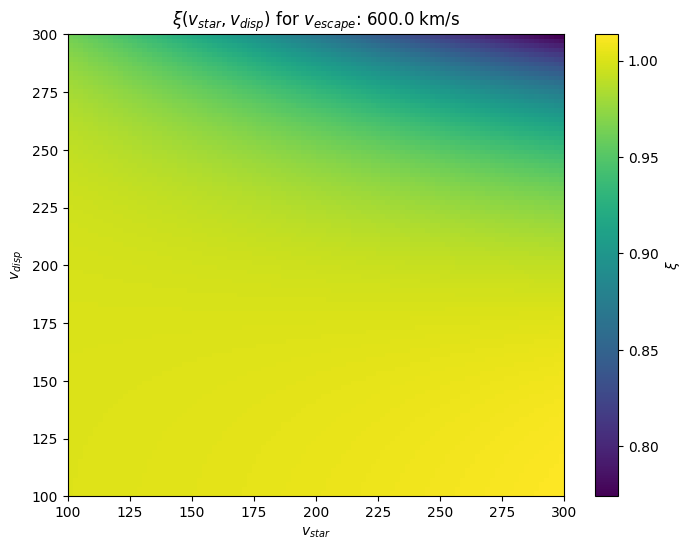

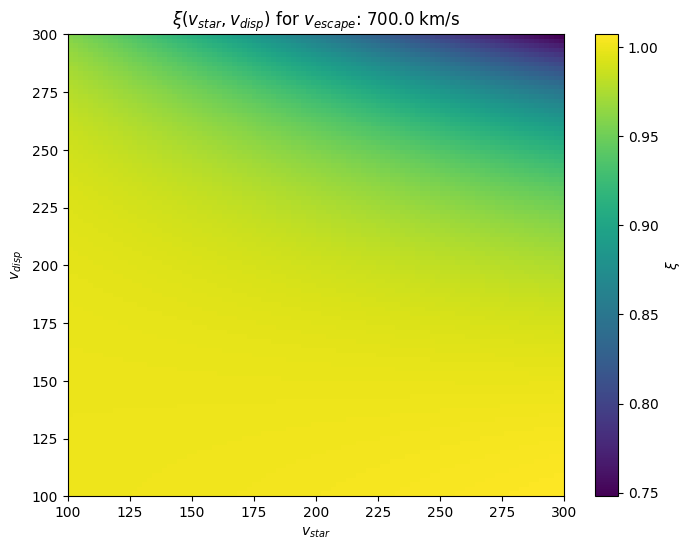

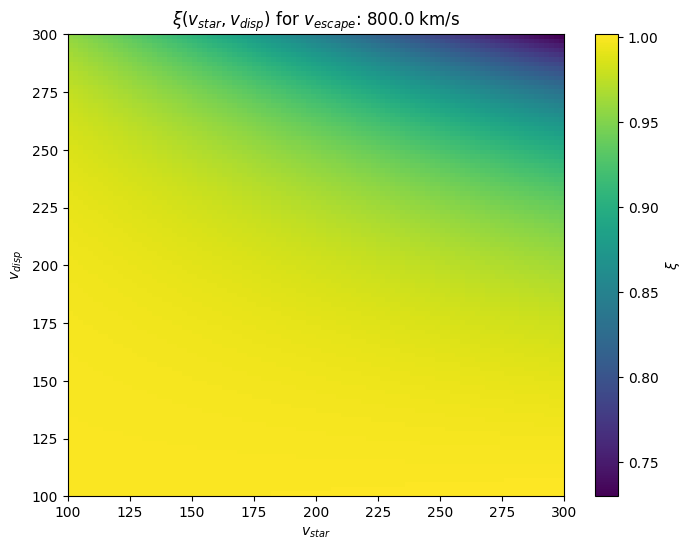

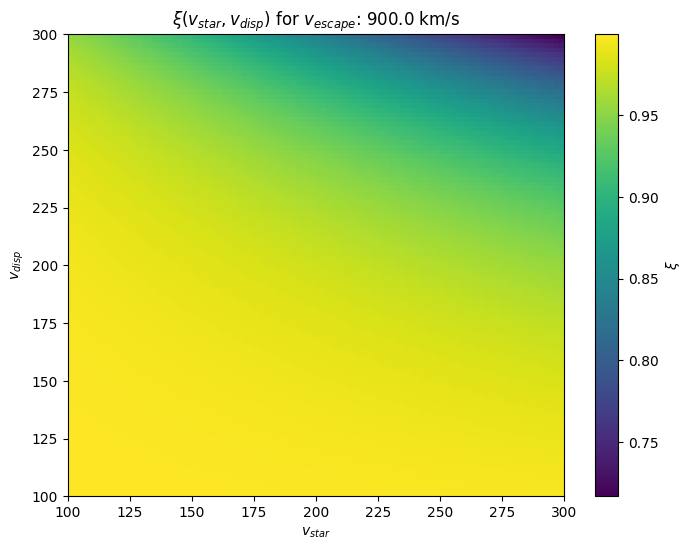

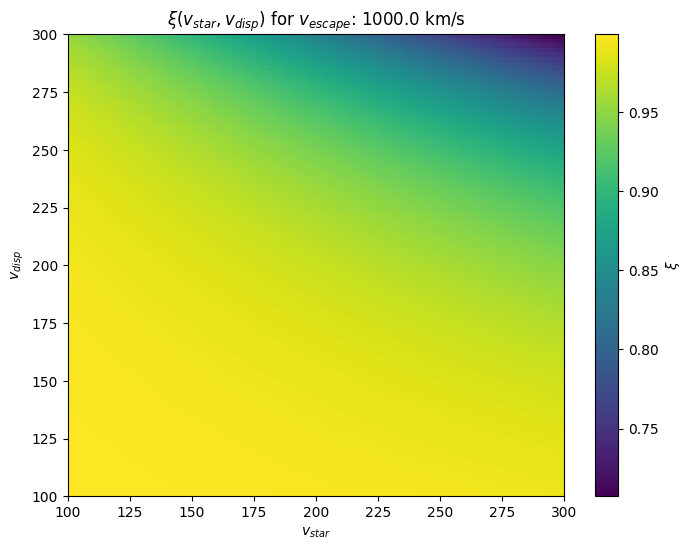

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special


# Genera gli array v_star e v_dispersion
v_star = np.linspace(100, 300, 100)
#print(v_star)
v_dispersion = np.linspace(1000, 300, 100)



def plot_xi(v_star,v_dispersion,v_escape):
    
    # Crea una griglia di coppie (v_star, v_dispersion) utilizzando meshgrid
    v_star, v_dispersion = np.meshgrid(v_star, v_dispersion)

    # Calcola i valori di xi(v_star, v_dispersion)
    xi =( (v_dispersion**2)*np.exp(-3/2*(v_star/v_dispersion)**2)+np.sqrt(np.pi/6)\
        *v_dispersion/v_star*(v_dispersion**2+3*v_escape**2+3*v_star**2)*\
        scipy.special.erf(np.sqrt(3/2)*v_star/v_dispersion))/(2*v_dispersion**2+3*v_escape**2)

    # Crea un plot bidimensionale
    plt.figure(figsize=(8, 6))
    plt.imshow(xi, extent=[100, 300, 100, 300] ,origin='lower', aspect='auto', cmap='viridis')
    plt.colorbar(label=r'$\xi$', orientation='vertical')
    plt.xlabel(r'$v_{star}$')
    plt.ylabel(r'$v_{disp}$')
    # Crea una stringa di titolo utilizzando LaTex per la formattazione
    titolo = r'$\xi(v_{{star}},v_{{disp}})$ for $v_{{escape}}$: {} km/s'.format(v_escape)
    plt.title(titolo)

    # Mostra il plot
    plt.show()

    return None

v_escape=np.linspace(1e2,1e3,10)

for indice, v_escape_val in enumerate(v_escape):
    plot_xi(v_star,v_dispersion,v_escape_val)


